In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
data=pd.read_csv("kc_house_data.csv")

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

There are no missing values, and all the variables are numerical, except the 'Date'

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###Data visualization

Feature by feature

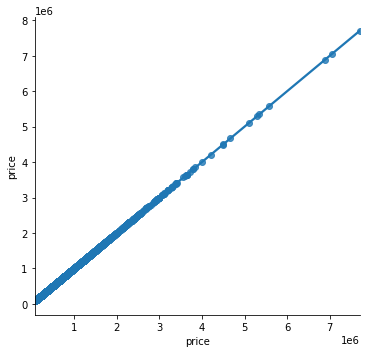

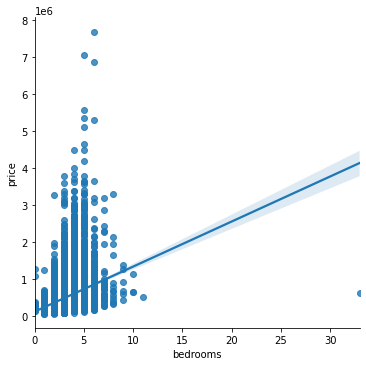

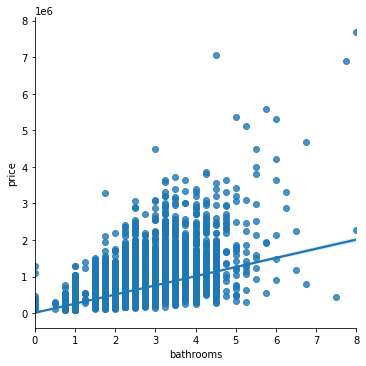

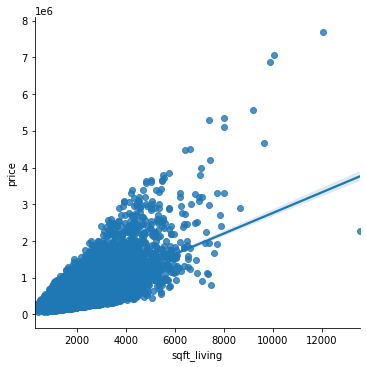

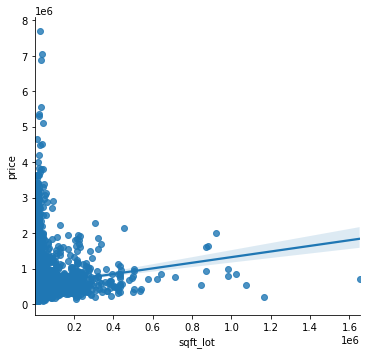

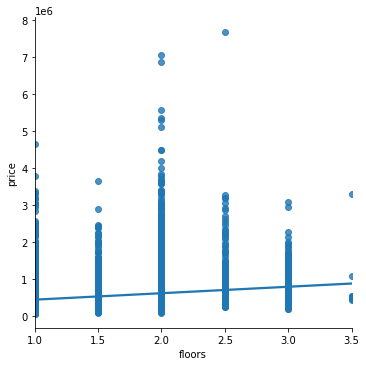

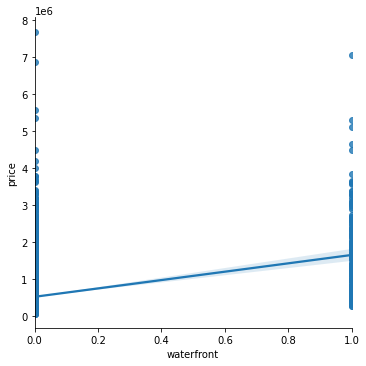

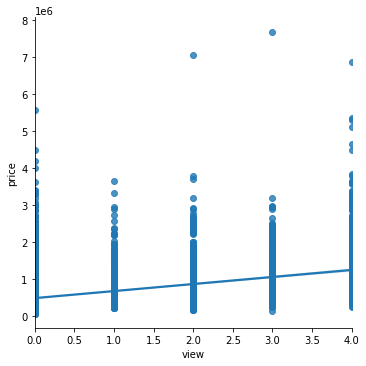

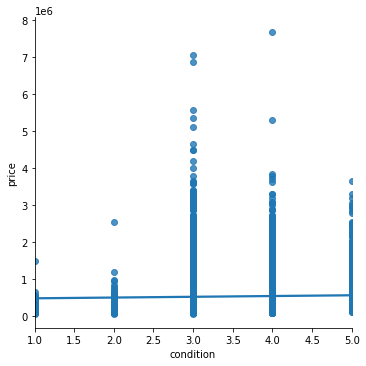

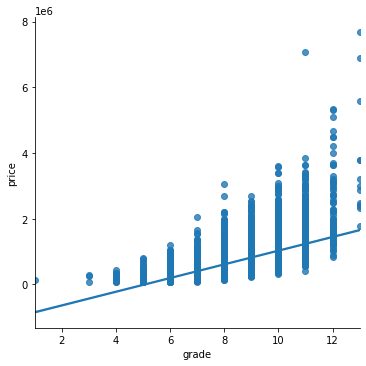

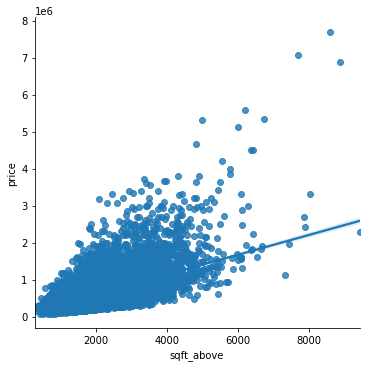

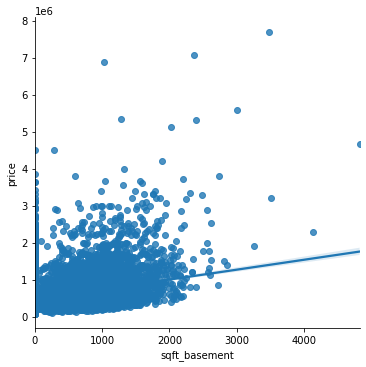

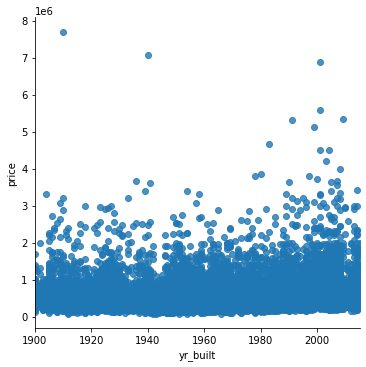

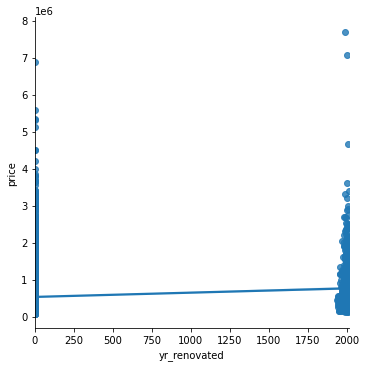

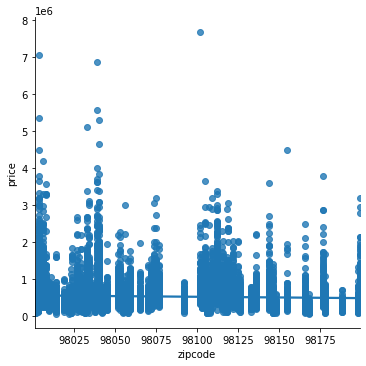

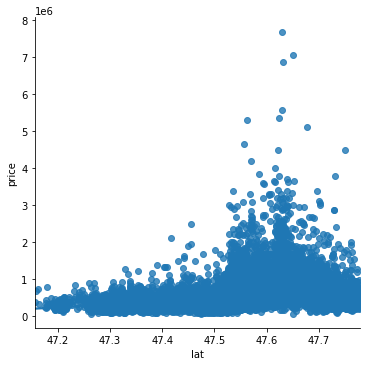

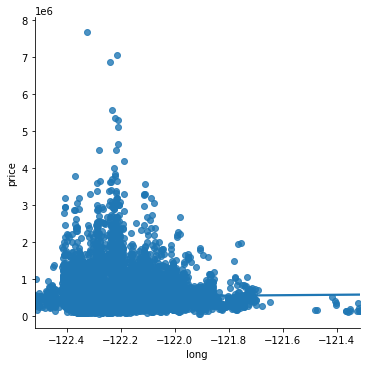

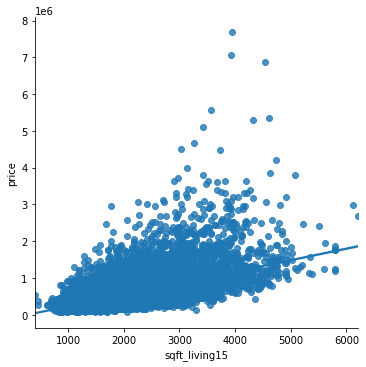

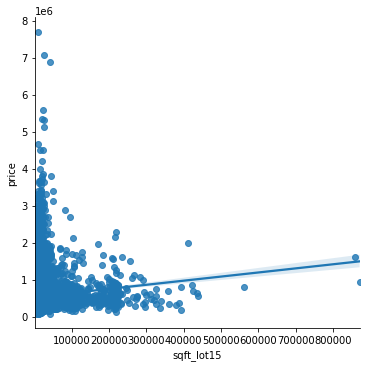

In [ ]:
for i in data.columns:
  if ( data[i].dtype ==  np.int64 ) | ( data[i].dtype ==  np.float64):
    sns.lmplot(x=i,y='price',data=data)

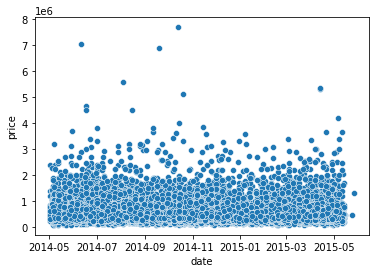

In [ ]:
sns.scatterplot(x='date',y='price',data=data)

From above visualizations we can see that year renovated, year built, condition features don't have significant impact on price.
 sqft_living, bathrooms, sqft_above, sqft_basement, view have strong influence.

Features that have strong impact on the price :
* bedrooms 
* bathrooms
* sqft_livig
* grade
* sqft_above
* sqft_basement
* sqft_living15

Features that have low or no influence on the price :
* floors
* waterfront
* view
* condition 
* yr_built
* yr_renovated
* zipcode
* lat 
* long
* sqft_lot15
* date
* sqft_lot

Let's check this in this heatmap, we focus on price row (or column)

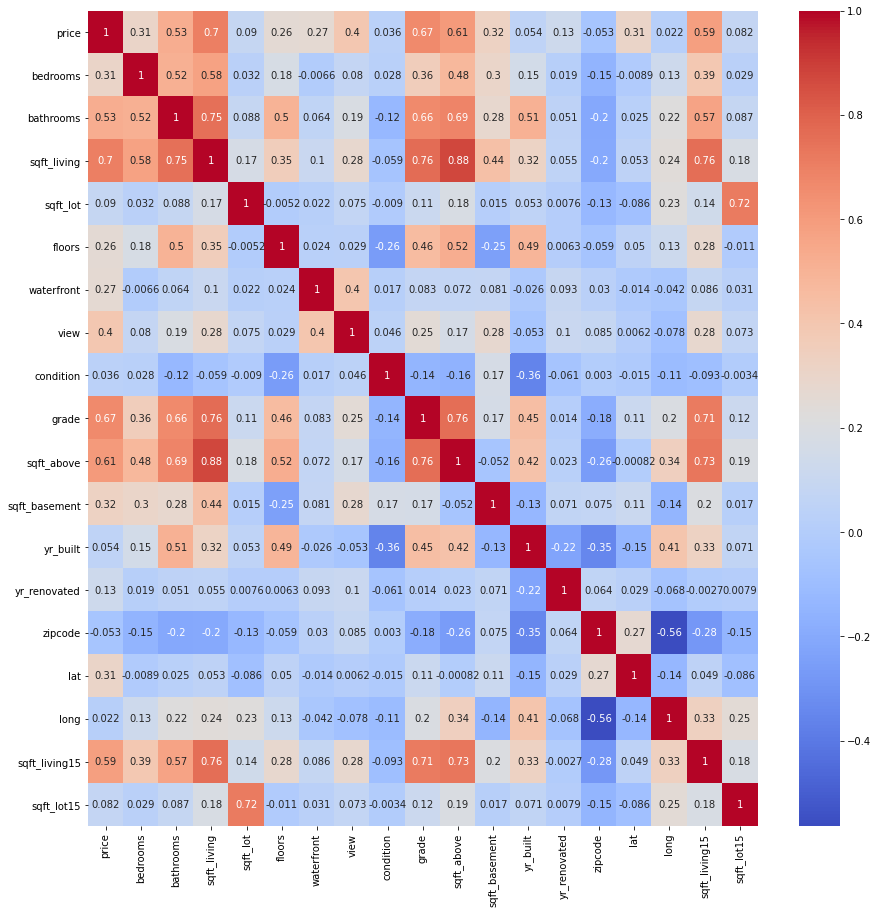

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(method='pearson'),annot=True,cmap='coolwarm')

From this plot, The features that have the strongest influence on price in reverse order : 
* sqft_living
* grade
* sqft_above
* bathrooms
* sqft_living15
* view
* sqft_basement
* bedrooms


##Linear Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


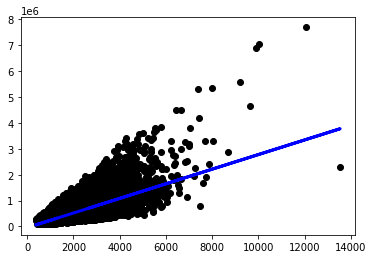

In [ ]:
x=data['sqft_living'][:,np.newaxis]
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
plt.scatter(x_train, y_train,  color='black')
plt.plot(x_train, y_pred, color='blue', linewidth=3)


In [ ]:
predict=model.predict(x_test)

In [ ]:
mean_squared_error(y_test,predict)

62451720102.954

In [ ]:
r2_score(y_test,predict)

0.5035535751151091

##Multilinear Regression

In [ ]:
x=data[['sqft_living','grade','sqft_above','bathrooms','sqft_living15','view','sqft_basement','bedrooms']]
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)

In [ ]:
predict=model.predict(x_test)

In [ ]:
mean_squared_error(y_test,predict)

52602989871.221985

In [ ]:
r2_score(y_test,predict)

0.5818439233255155

We get a better R squared score, the multilinear model is better

##Polynomial Regression

In [ ]:
x=data[['sqft_living','grade','sqft_above','bathrooms','sqft_living15','view','sqft_basement','bedrooms']]
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
model=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit=poly.fit_transform(x_train)
model.fit(x_train_fit,y_train)
x_test_=poly.fit_transform(x_test)
predicted=model.predict(x_test_)


In [ ]:
mean_squared_error(y_test,predicted)

46561415726.57505

In [ ]:
r2_score(y_test,predicted)

0.6298701086706505

We get an even better R squared score